In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\EXCELR\Assingments\Answers\Simple Linear Regression\delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
df.duplicated().sum()

0

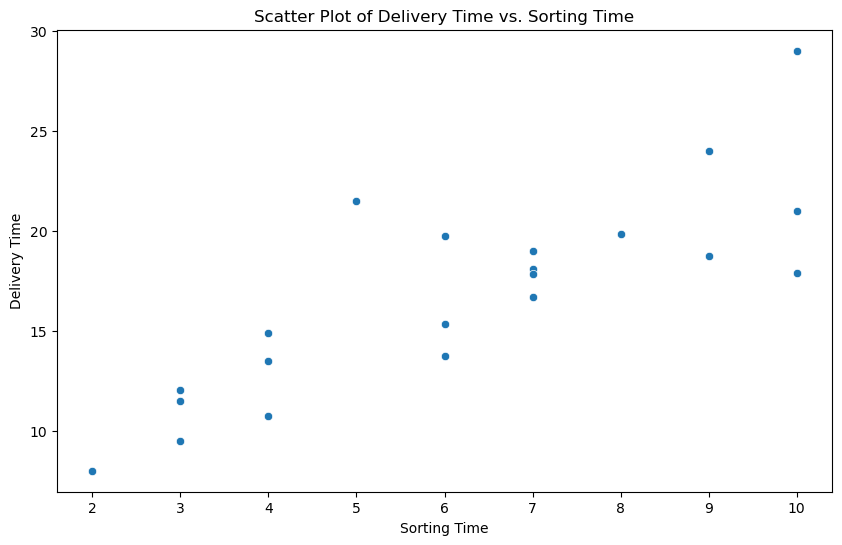

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=df)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Scatter Plot of Delivery Time vs. Sorting Time')
plt.show()

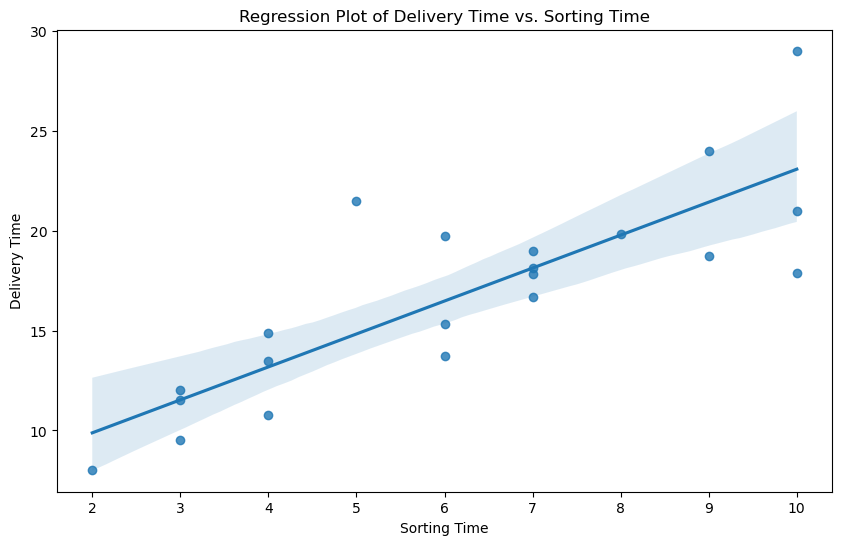

In [8]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Sorting Time', y='Delivery Time', data=df)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Regression Plot of Delivery Time vs. Sorting Time')
plt.show()

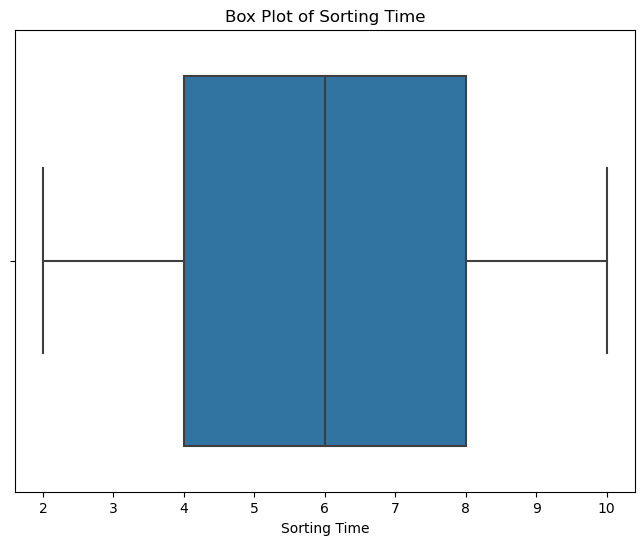

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sorting Time', data=df)
plt.xlabel('Sorting Time')
plt.title('Box Plot of Sorting Time')
plt.show()

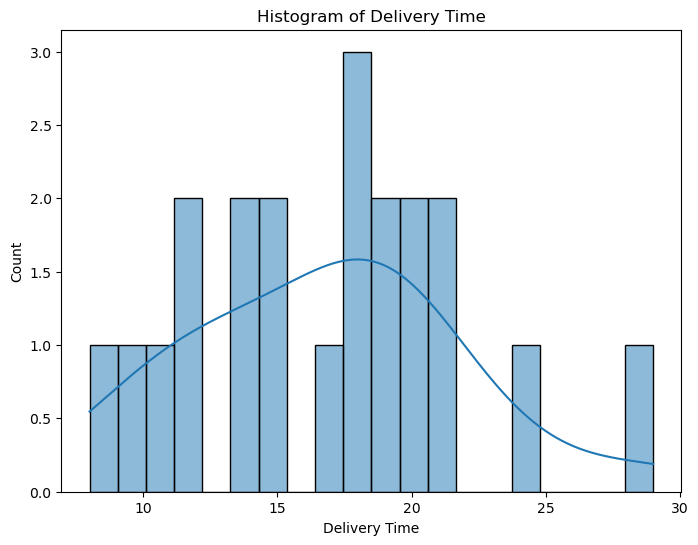

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Delivery Time'], bins=20, kde=True)
plt.xlabel('Delivery Time')
plt.title('Histogram of Delivery Time')
plt.show()

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
rg = LinearRegression()

In [15]:
rg.fit(X_train,y_train)

LinearRegression()

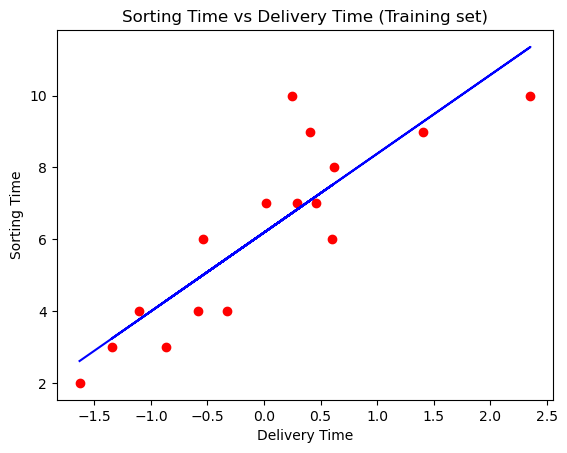

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, rg.predict(X_train), color = 'blue')
plt.title('Sorting Time vs Delivery Time (Training set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

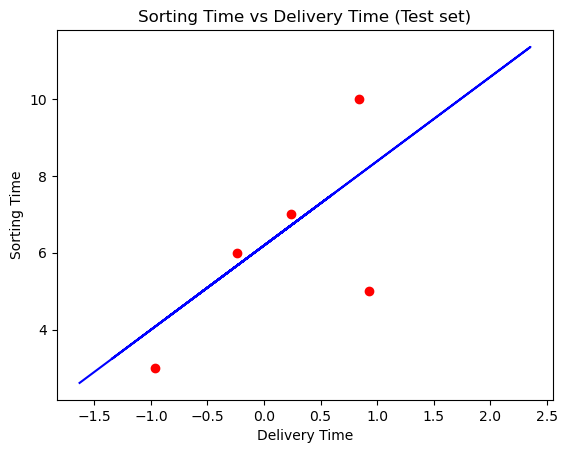

In [17]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, rg.predict(X_train), color = 'blue')
plt.title('Sorting Time vs Delivery Time (Test set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [18]:
y_pred = rg.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 3.137810556832114
R-squared: 0.41458758268057583


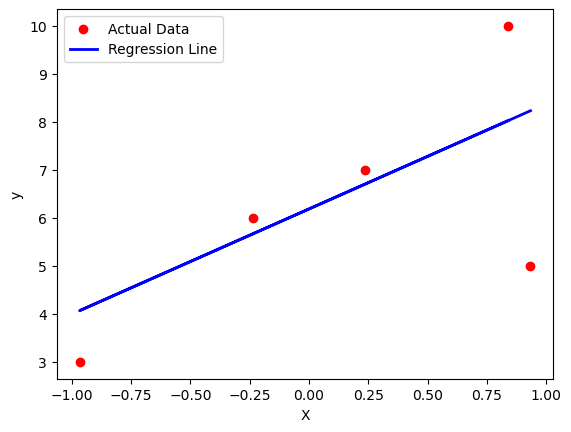

In [21]:
plt.scatter(X_test, y_test, color='red', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# New Changes

In [22]:
def calculate_rmse(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    return rmse

In [23]:
model_no_transformation = LinearRegression()
model_no_transformation.fit(X_train, y_train)
rmse_no_transformation = calculate_rmse(model_no_transformation, X_test, y_test)
print(f'RMSE without transformation: {rmse_no_transformation}')

RMSE without transformation: 1.7713866198072385


In [24]:
model_log_transformation = LinearRegression()
model_log_transformation.fit(X_train, np.log1p(y_train))
rmse_log_transformation = calculate_rmse(model_log_transformation, X_test, y_test)
print(f'RMSE with log transformation: {rmse_log_transformation}')

RMSE with log transformation: 4.764776214731927


In [26]:
model_square_transformation = LinearRegression()
model_square_transformation.fit(X_train, np.square(y_train))
rmse_square_transformation = calculate_rmse(model_square_transformation, X_test, y_test)
print(f'RMSE with square transformation: {rmse_square_transformation}')

RMSE with square transformation: 46.207543504332556


In [27]:
model_sqrt_transformation = LinearRegression()
model_sqrt_transformation.fit(X_train, np.sqrt(y_train))
rmse_sqrt_transformation = calculate_rmse(model_sqrt_transformation, X_test, y_test)
print(f'RMSE with square root transformation: {rmse_sqrt_transformation}')

RMSE with square root transformation: 4.257592779548598
